<a href="https://colab.research.google.com/github/poet5th/testrepo/blob/main/KNOU_%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B3%BC%EC%A0%9C1st_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
import json
import time

# API 정보
API_KEY = "415a63624b706f653430776b6c7462"
BASE_URL = f"http://openapi.seoul.go.kr:8088/{API_KEY}/json/energyUseDataSummaryInfo"

# 데이터를 저장할 리스트
data_list = []

# 2015년 1월부터 2024년 12월까지 반복
for year in range(2015, 2025):
    for month in range(1, 13):
        # API URL 만들기 (월을 2자리로 포맷팅)
        url = f"{BASE_URL}/1/5/{year}/{month:02d}"

        print(f"{year}년 {month}월 데이터 가져오는 중... URL: {url}")

        try:
            # API 호출
            response = requests.get(url)
            data = response.json()

            # 데이터가 있으면 리스트에 추가
            if "energyUseDataSummaryInfo" in data:
                if "row" in data["energyUseDataSummaryInfo"]:
                    rows = data["energyUseDataSummaryInfo"]["row"]
                    data_list.extend(rows)
                    print(f"  -> {len(rows)}개 데이터 수집 완료")
                else:
                    print(f"  -> 데이터 없음")
            else:
                print(f"  -> 응답 오류: {data}")

            # 서버 부담 줄이기 위해 잠시 대기
            time.sleep(0.3)

        except Exception as e:
            print(f"  -> 에러 발생: {e}")
            continue

# JSON 파일로 저장
with open("seoul_energy_data.json", "w", encoding="utf-8") as f:
    json.dump(data_list, f, ensure_ascii=False, indent=2)

print(f"\n총 {len(data_list)}개 데이터 저장 완료!")
print("파일명: seoul_energy_data.json")

2015년 1월 데이터 가져오는 중... URL: http://openapi.seoul.go.kr:8088/415a63624b706f653430776b6c7462/json/energyUseDataSummaryInfo/1/5/2015/01
  -> 5개 데이터 수집 완료
2015년 2월 데이터 가져오는 중... URL: http://openapi.seoul.go.kr:8088/415a63624b706f653430776b6c7462/json/energyUseDataSummaryInfo/1/5/2015/02
  -> 5개 데이터 수집 완료
2015년 3월 데이터 가져오는 중... URL: http://openapi.seoul.go.kr:8088/415a63624b706f653430776b6c7462/json/energyUseDataSummaryInfo/1/5/2015/03
  -> 5개 데이터 수집 완료
2015년 4월 데이터 가져오는 중... URL: http://openapi.seoul.go.kr:8088/415a63624b706f653430776b6c7462/json/energyUseDataSummaryInfo/1/5/2015/04
  -> 5개 데이터 수집 완료
2015년 5월 데이터 가져오는 중... URL: http://openapi.seoul.go.kr:8088/415a63624b706f653430776b6c7462/json/energyUseDataSummaryInfo/1/5/2015/05
  -> 5개 데이터 수집 완료
2015년 6월 데이터 가져오는 중... URL: http://openapi.seoul.go.kr:8088/415a63624b706f653430776b6c7462/json/energyUseDataSummaryInfo/1/5/2015/06
  -> 5개 데이터 수집 완료
2015년 7월 데이터 가져오는 중... URL: http://openapi.seoul.go.kr:8088/415a63624b706f653430776b6c7462/jso

In [4]:
import pandas as pd
import json

# JSON 파일 읽기
with open("seoul_energy_data.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# DataFrame으로 변환
df = pd.DataFrame(data)

# 기본 정보 출력
print("=" * 50)
print("데이터 기본 정보")
print("=" * 50)

# 데이터 크기
print(f"\n전체 데이터 개수: {len(df)}개")
print(f"컬럼 개수: {len(df.columns)}개")

# 컬럼 이름
print("\n컬럼 목록:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

# 데이터 타입
print("\n데이터 타입:")
print(df.dtypes)

# 처음 5개 데이터
print("\n처음 5개 데이터:")
print(df.head())

# 기본 통계
print("\n기본 통계:")
print(df.describe())

# 결측치 확인
print("\n결측치 개수:")
print(df.isnull().sum())

# CSV 파일로 저장 (선택사항)
df.to_csv("seoul_energy_data.csv", index=False, encoding="utf-8-sig")
print("\n CSV 파일로도 저장 완료: seoul_energy_data.csv")

데이터 기본 정보

전체 데이터 개수: 600개
컬럼 개수: 25개

컬럼 목록:
  1. YEAR
  2. MON
  3. MM_TYPE
  4. CNT
  5. EUS
  6. EUS1
  7. EUS2
  8. ECO2_1
  9. ECO2_2
  10. GUS
  11. GUS1
  12. GUS2
  13. GCO2_1
  14. GCO2_2
  15. WUS
  16. WUS1
  17. WUS2
  18. WCO2_1
  19. WCO2_2
  20. HUS
  21. HUS1
  22. HUS2
  23. HCO2_1
  24. HCO2_2
  25. REG_DATE

데이터 타입:
YEAR        object
MON         object
MM_TYPE     object
CNT         object
EUS         object
EUS1        object
EUS2        object
ECO2_1      object
ECO2_2      object
GUS         object
GUS1        object
GUS2        object
GCO2_1      object
GCO2_2      object
WUS         object
WUS1        object
WUS2        object
WCO2_1      object
WCO2_2      object
HUS         object
HUS1        object
HUS2        object
HCO2_1      object
HCO2_2      object
REG_DATE    object
dtype: object

처음 5개 데이터:
   YEAR MON  MM_TYPE     CNT        EUS       EUS1       EUS2     ECO2_1  \
0  2015  01       개인  767791  193784708  194781915  204969429   -6090964   
1  2015  

In [7]:
import pandas as pd
import json

# JSON 파일 읽기
with open("seoul_energy_data.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# DataFrame으로 변환
df = pd.DataFrame(data)

print("원본 데이터:")
print(df.head())

# year 컬럼 추가 (YEAR 컬럼을 year로 복사)
df['year'] = df['YEAR']

# month 컬럼 추가 (MON 컬럼을 숫자로 변환)
df['month'] = df['MON'].astype(int)

# 계절 컬럼 추가
season_list = []
for month in df['month']:
    if 3 <= month <= 5:
        season_list.append('봄')
    elif 6 <= month <= 8:
        season_list.append('여름')
    elif 9 <= month <= 11:
        season_list.append('가을')
    else:
        season_list.append('겨울')

df['season'] = season_list

# 결과 확인
print("\n변환 후 데이터:")
print(df[['year', 'month', 'season']].head(10))

print("\n연도별 데이터 개수:")
print(df['year'].value_counts().sort_index())

print("\n계절별 데이터 개수:")
print(df['season'].value_counts())

print("\n연도별, 계절별 데이터 분포:")
print(pd.crosstab(df['year'], df['season']))

# CSV 저장
df.to_csv("energy_data_processed.csv", index=False, encoding="utf-8-sig")
print("\n처리 완료!")

원본 데이터:
   YEAR MON  MM_TYPE     CNT        EUS       EUS1       EUS2     ECO2_1  \
0  2015  01       개인  767791  193784708  194781915  204969429   -6090964   
1  2015  01       학교    1382  134955565  128707423  145561511   -2178902   
2  2015  01     종교단체      32     372270     363376     411363   -15099.5   
3  2015  01     소상공인    2058   10249618    9927610   11039593  -233983.5   
4  2015  01  공동주택관리소    1747  327102096  329852334  351694752  -13671447   

         ECO2_2       GUS  ...          WUS1         WUS2    WCO2_1  \
0  -2582568.736  59133720  ...  12723680.426  12899476.73  8179.308   
1   -923854.448   9107197  ...     2097433.8    2133200.8  -39498.1   
2     -6402.188     53331  ...          4548         4519    1411.5   
3    -99209.004    536119  ...      146480.6     147325.6     369.9   
4  -5796693.528  22834274  ...      12763070   12979835.8  -26645.4   

        WCO2_2           HUS          HUS1          HUS2        HCO2_1  \
0  2715.530256  22740838.937  2340

데이터 컬럼:
['YEAR', 'MON', 'MM_TYPE', 'CNT', 'EUS', 'EUS1', 'EUS2', 'ECO2_1', 'ECO2_2', 'GUS', 'GUS1', 'GUS2', 'GCO2_1', 'GCO2_2', 'WUS', 'WUS1', 'WUS2', 'WCO2_1', 'WCO2_2', 'HUS', 'HUS1', 'HUS2', 'HCO2_1', 'HCO2_2', 'REG_DATE', 'year', 'month', 'season']

데이터 샘플:
   YEAR  MON  MM_TYPE     CNT        EUS       EUS1       EUS2      ECO2_1  \
0  2015    1       개인  767791  193784708  194781915  204969429  -6090964.0   
1  2015    1       학교    1382  134955565  128707423  145561511  -2178902.0   
2  2015    1     종교단체      32     372270     363376     411363    -15099.5   
3  2015    1     소상공인    2058   10249618    9927610   11039593   -233983.5   
4  2015    1  공동주택관리소    1747  327102096  329852334  351694752 -13671447.0   

        ECO2_2         GUS  ...        WCO2_2           HUS          HUS1  \
0 -2582568.736  59133720.0  ...   2715.530256  2.274084e+07  2.340006e+07   
1  -923854.448   9107197.0  ... -13113.369200  0.000000e+00  0.000000e+00   
2    -6402.188     53331.0  ...    468

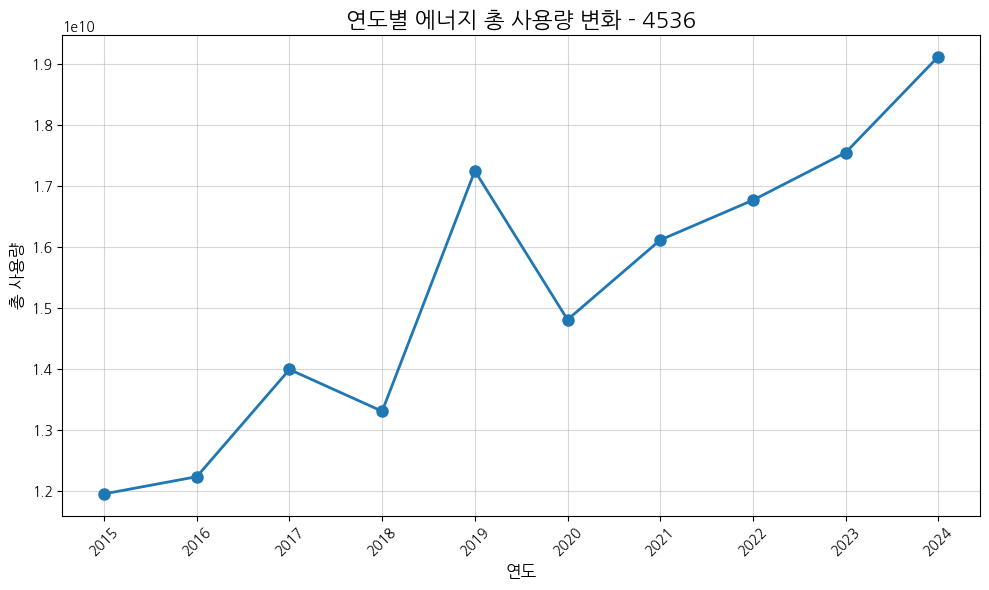


연도별 에너지 총 사용량:
year
2015    1.195900e+10
2016    1.224119e+10
2017    1.399803e+10
2018    1.331306e+10
2019    1.725314e+10
2020    1.481475e+10
2021    1.611997e+10
2022    1.677296e+10
2023    1.755233e+10
2024    1.912580e+10
Name: total_energy, dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 읽기
df = pd.read_csv("energy_data_processed.csv", encoding="utf-8-sig")

# 학번 뒤 4자리 (여기에 본인 학번 입력)
student_id = "4536"  # <-- 여기에 본인 학번 뒤 4자리 입력!

# 에너지 사용량 컬럼 확인
print("데이터 컬럼:")
print(df.columns.tolist())
print("\n데이터 샘플:")
print(df.head())

# 에너지 총 사용량 계산
# EUS: 전기, GUS: 가스, WUS: 수도, HUS: 지역난방 (추정)
df['total_energy'] = df['EUS'] + df['GUS'] + df['WUS'] + df['HUS']

# 연도별 총 사용량 계산
yearly_total = df.groupby('year')['total_energy'].sum()

# 선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(yearly_total.index, yearly_total.values, marker='o', linewidth=2, markersize=8)
plt.title(f'연도별 에너지 총 사용량 변화 - {student_id}', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('총 사용량', fontsize=12)
plt.grid(True, alpha=0.5)
plt.xticks(yearly_total.index, rotation=45)
plt.tight_layout()

# 그래프 저장
plt.savefig(f'연도별_에너지_총_사용량_{student_id}.png', dpi=300)
print(f"\n그래프 저장 완료: 연도별_에너지_총_사용량_{student_id}.png")

# 그래프 출력
plt.show()

# 연도별 사용량 출력
print("\n연도별 에너지 총 사용량:")
print(yearly_total)

계절별 가스 사용량 평균:
season
봄     1.218347e+07
여름    6.267135e+06
가을    6.331592e+06
겨울    1.911998e+07
Name: GUS, dtype: float64

그래프 저장 완료: 계절별_가스_사용량_평균.png


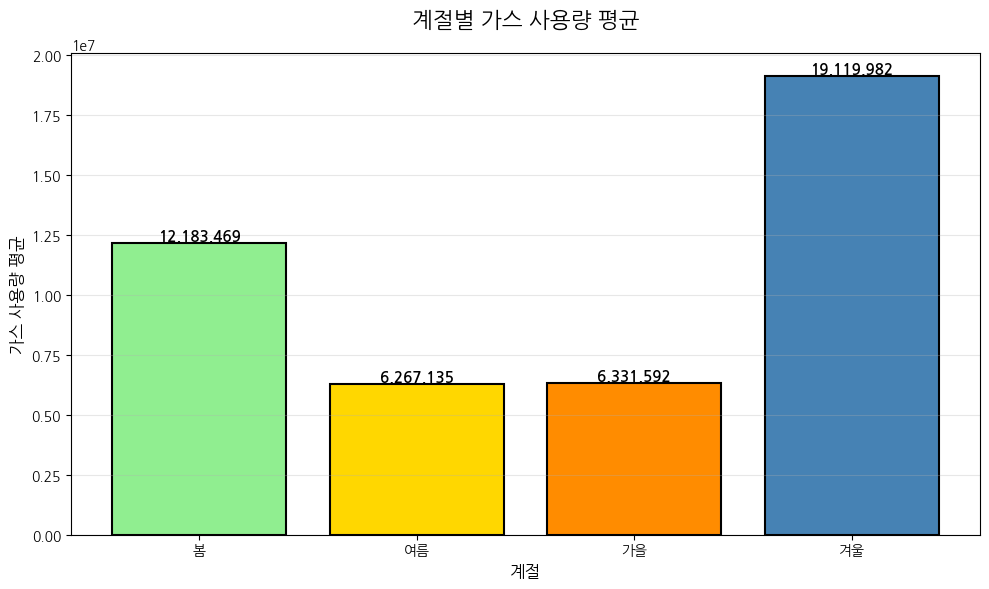

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 읽기
df = pd.read_csv("energy_data_processed.csv", encoding="utf-8-sig")

# 계절별 가스 사용량 평균 계산
season_gas_avg = df.groupby('season')['GUS'].mean()

# 계절 순서 정렬 (봄, 여름, 가을, 겨울)
season_order = ['봄', '여름', '가을', '겨울']
season_gas_avg = season_gas_avg.reindex(season_order)

print("계절별 가스 사용량 평균:")
print(season_gas_avg)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.bar(season_gas_avg.index, season_gas_avg.values,
               color=['#90EE90', '#FFD700', '#FF8C00', '#4682B4'],
               edgecolor='black', linewidth=1.5)

plt.title('계절별 가스 사용량 평균', fontsize=16, pad=20)
plt.xlabel('계절', fontsize=12)
plt.ylabel('가스 사용량 평균', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# 각 막대 위에 수치 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()

# 그래프 저장
plt.savefig('계절별_가스_사용량_평균.png', dpi=300, bbox_inches='tight')
print("\n그래프 저장 완료: 계절별_가스_사용량_평균.png")

# 그래프 출력
plt.show()

In [9]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,114 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr